<a href="https://colab.research.google.com/github/youminpark/NEUR265/blob/main/homework/coding_homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #6

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw6.csv</code>, <code>acc_fa_hw6.csv</code>, <code>lc_hits_hw6.csv</code>, and <code>lc_fa_hw6.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code>, <code>acc_fa</code>, <code>lc_hits</code>, and <code>lc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array.

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex, and both your <code>lc_hits</code> and <code>lc_fa</code> arrays consist of LFP data simultaneously recorded from the mouse locus coeruleus (an area in the brainstem with neurons that produce the neurotransmitter norepinephrine). Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). Similarly to last week, the task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> and <code>lc_hits</code> variables contain LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> and <code>lc_fa</code> variables contain LFP surrounding these false alarms. So, you have four arrays - two arrays with LFP recorded during correct choices (hits), and two arrays with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as your four arrays, with equally spaced values between "zero" and "four" (the length of each trial, in seconds).

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_hits</code> in the same plot in <font color = 'blue'>blue</font> in one subplot. In a second subplot, plot the first trial of <code>acc_fa</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_fa</code> in <font color = 'blue'>blue</font>. Put time on the x-axis of both of your subplots. Label the axes of your subplots.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation in the ACC LFP might be, and what the dominant oscillation in the locus coeruleus (LC) LFP might be. Are the two different? By visual inspection, do you notice any relationship between the two brain areas during the "hit" you plotted, or the "false alarm" you plotted? Recall from our notebook on phase coherence that sometimes the peaks and troughs of two oscillations have a consistent relationship across time. Is there any evidence of this in the raw LFP?

10. In a new *Code Cell*, compute the coherence for <code>acc_hits</code> and <code>lc_hits</code>. Make sure to follow the steps in the "Computing the Coherence" section of our notebook from last week. The end result should be a plot with "Frequency (Hz)" on the x-axis, and "Coherence" on the y-axis. Label your axes.

11. In a new *Markdown Cell*, describe your results. In which frequency band is there the most phase coherence during hits?

12. In a new *Code Cell*, repeat step 10, but with <code>acc_fa</code> and <code>lc_fa</code>. Plot the results from step 10 in <font color = 'red'>red</font>, and the results from this step in <font color = 'blue'>blue</font>, in the same plot (in other words, you should have one plot, with two different lines on it - one will be the coherence for "hits" that you calculated in step 10, and one will be the coherence for "false alarms"). Label your axes.

13. In a new *Markdown Cell*, intepret your plot from step 12. Is the frequency at which coherence is strongest different between hits and false alarms? Is coherence higher/lower during hits vs. false alarms? If higher coherence means more communication between the ACC and LC, are these two brain areas talking to each more or less during hits vs. false alarms?

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_6.ipynb</code>.





#### Youmin Park
*28 March 2024*

**NEUR 265: Intro to Neural Data Analysis**

In [1]:
# Question 2: import packages
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Question 3: import csv files
acc_hits_url = 'https://raw.githubusercontent.com/youminpark/NEUR265/main/acc_hits_hw6.csv';
acc_fa_url = 'https://raw.githubusercontent.com/youminpark/NEUR265/main/acc_fa_hw6.csv';
lc_hits_url = 'https://raw.githubusercontent.com/youminpark/NEUR265/main/lc_hits_hw6.csv';
lc_fa_url = 'https://raw.githubusercontent.com/youminpark/NEUR265/main/lc_fa_hw6.csv';

acc_hits = np.loadtxt(acc_hits_url, delimiter = ',');
acc_fa = np.loadtxt(acc_fa_url, delimiter = ',');
lc_hits = np.loadtxt(lc_hits_url, delimiter = ',');
lc_fa = np.loadtxt(lc_fa_url, delimiter = ',');

In [5]:
# Question 4: print the shape of each array
print(np.shape(acc_hits));
print(np.shape(acc_fa));
print(np.shape(lc_hits));
print(np.shape(lc_fa));

(14, 8001)
(19, 8001)
(14, 8001)
(19, 8001)


In [15]:
# Question 6: create time variable
time = np.linspace(0,4,8001);

In [14]:
# Question 7: determine the sampling frequency
sample_count = 8001;
sample_time = 4;
frequency = sample_count/sample_time;
print(frequency, 'Hz');

2000.25 Hz


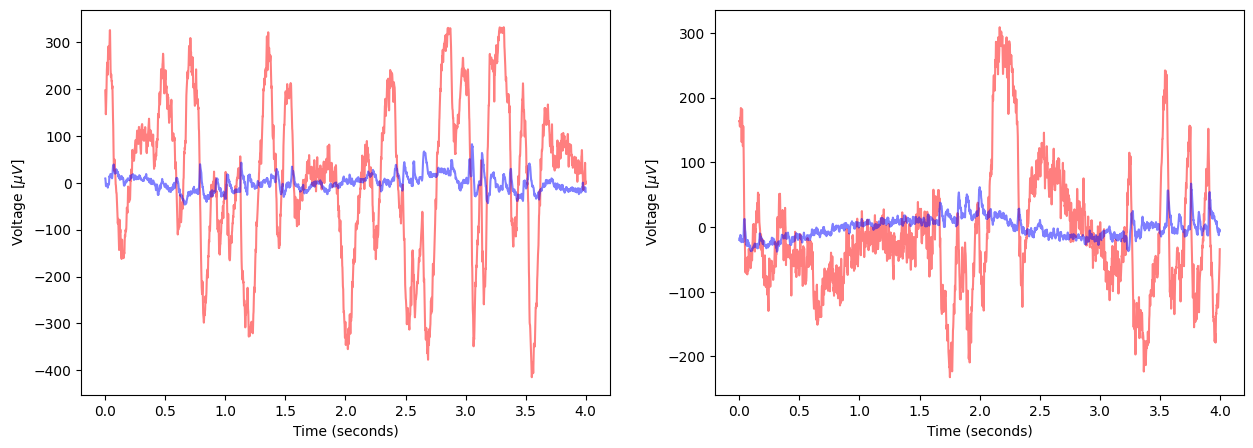

In [22]:
# Question 8: generate two subplots
fig, ax = plt.subplots(1,2, figsize=(15,5));
ax[0].plot(time, acc_hits[0], 'r', alpha = 0.5);
ax[0].plot(time, lc_hits[0], 'b', alpha = 0.5);
ax[0].set_ylabel('Voltage [$\mu V$]');
ax[0].set_xlabel('Time (seconds)');

ax[1].plot(time, acc_fa[0], 'r', alpha = 0.5);
ax[1].plot(time, lc_fa[0], 'b', alpha = 0.5);
ax[1].set_ylabel('Voltage [$\mu V$]');
ax[1].set_xlabel('Time (seconds)');

#### Question 9: interpret plots
* For the hits data, the dominant oscillation in the ACC LFP was observed to be 11/4 Hz. The LC LFP was found to be 6 Hz.
* The LC LFP dominant oscillation is greater than the frequency found for the ACC LFP.
* Across both graphs, it seems that the LC data peaks on the downswing of the ACC data.

Text(0.5, 1.0, 'Coherence between two electrodes')

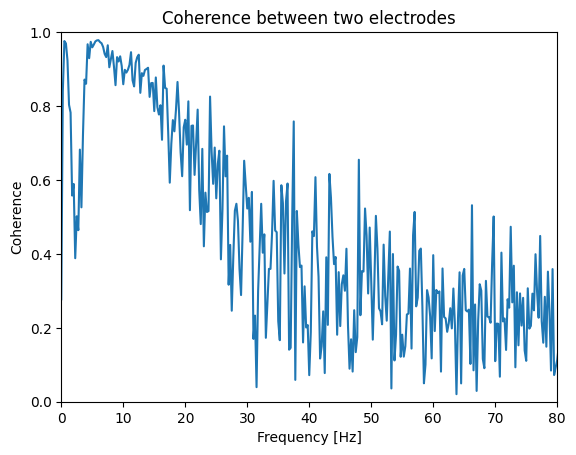

In [30]:
# Question 10: compute the coherence for the hits data
dt = time[1] - time[0]              # Define the sampling interval.
N = acc_hits.shape[1]               # Define number of points in each trial.

# Compute the Fourier transforms
hits_xf = np.array([np.fft.rfft(x - x.mean()) for x in acc_hits])  # ... for each trial in E1
hits_yf = np.array([np.fft.rfft(y - y.mean()) for y in lc_hits])  # ... and each trial in E2

# Compute the spectra
T = time[-1]
hits_scale = 2 * dt**2 / T
hits_Sxx = hits_scale * (hits_xf * hits_xf.conj()).mean(0)  # Spectrum of E1 trials
hits_Syy = hits_scale * (hits_yf * hits_yf.conj()).mean(0)  # ... and E2 trials
hits_Sxy = hits_scale * (hits_xf * hits_yf.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
hits_cohr = np.abs(hits_Sxy) / (np.sqrt(hits_Sxx) * np.sqrt(hits_Syy))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.
plt.plot(f, hits_cohr.real)                      # Plot coherence vs frequency,
plt.xlim([0, 80])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')

#### Question 11: interpret hits coherence results
* Coherence peaks at approximately 3 and 5-8 Hz and then decreases from there.
* There is a dip in coherence from 3-5 Hz.

Text(0.5, 1.0, 'Coherence between two electrodes')

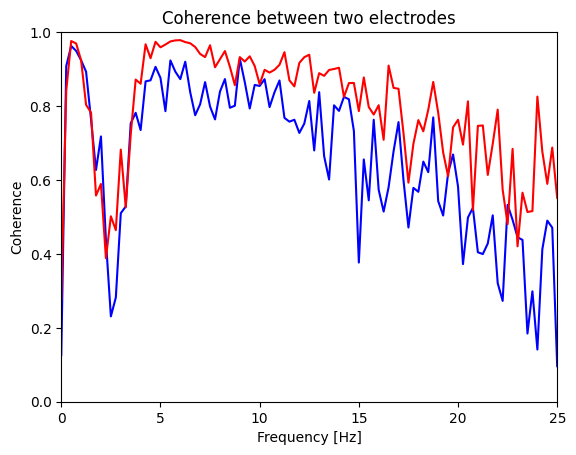

In [35]:
# Question 12: compute the coherence for the false alarm data
dt = time[1] - time[0]              # Define the sampling interval.
N = acc_fa.shape[1]               # Define number of points in each trial.

# Compute the Fourier transforms
xf = np.array([np.fft.rfft(x - x.mean()) for x in acc_fa])  # ... for each trial in E1
yf = np.array([np.fft.rfft(y - y.mean()) for y in lc_fa])  # ... and each trial in E2

# Compute the spectra
T = time[-1]
scale = 2 * dt**2 / T
Sxx = scale * (xf * xf.conj()).mean(0)  # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)  # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
cohr = np.abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.
plt.plot(f, cohr.real, 'b')                      # Plot coherence vs frequency,
plt.plot(f, hits_cohr.real, 'r')                      # Plot coherence vs frequency,
plt.xlim([0, 25])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')

#### Question 13: interpret combined coherence results
* The hits and FA data is similar in shape, but the FA data is generally lower than the hits data across all frequencies.
* Coherence is higher for hits, which imoplies there is greater communication between the ACC and LC.